In [2]:
!pip install pydrive

In [3]:
from pydrive.auth import GoogleAuth

gauth = GoogleAuth()
gauth.LocalWebserverAuth()


Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=373742402530-ko7282788j08i0a33otq1s9sddu9nidg.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /home/jcons17/.kaggle/kaggle.json

In [5]:
!chmod 600 /home/jcons17/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d ekrembayar/fifa-21-complete-player-dataset

fifa-21-complete-player-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip -f -q fifa-21-complete-player-dataset.zip 


In [14]:
ls

Copy_of_Importar_kaggle_googlecolab.ipynb*
Tarea_2.ipynb*
client_secrets.json*
fifa-21-complete-player-dataset.zip*
fifa21_male2.csv*
kaggle.json*


In [16]:
from pydrive.drive import GoogleDrive

drive = GoogleDrive(gauth)

file1 = drive.CreateFile({'title': 'fifa21_male2.csv'})
file1.SetContentFile('fifa21_male2.csv')
file1.Upload()

In [251]:
import pandas as pd
url='https://drive.google.com/uc?export=download&id=' + file1["id"]
data = pd.read_csv(url)


/home/jcons17/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
import numpy as np
df=pd.DataFrame(data)


In [269]:
columns

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [110]:
columns=[]
for i in df.columns:
    columns.append(i)
columnsdrop=columns[23:67]+columns[78:107]
columnsdrop.extend(["Team & Contract","Player Photo","Club Logo","Flag Photo","Loan Date End","Release Clause","Joined"])


In [223]:
Players=df.drop(columns=columnsdrop)
Players.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'POT', 'Height', 'Weight', 'foot', 'Growth', 'Value',
       'Wage', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY'],
      dtype='object')

## ¿Cuantos jugadores registrados tiene el Fifa 21?


In [117]:
Num_Players=Players.shape[0]

### El fifa 21 tiene {{Num_Players}} jugadores

## ¿Cual es el top 10 de jugadores en Fifa 21?


In [119]:
Players.sort_values(by="OVA",ascending=False).head(10).drop(columns=Players.columns[16:])


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Height,Weight,foot,Growth,Value,Wage
752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,RW ST CF,93,"5'7""",159lbs,Left,0,€67.5M,€560K
142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,ST LW,92,"6'2""",183lbs,Right,0,€46M,€220K
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,91,"5'11""",154lbs,Right,0,€87M,€370K
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,91,"6'0""",176lbs,Right,0,€80M,€240K
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,91,"5'9""",150lbs,Right,0,€90M,€270K
3665,200389,J. Oblak,27,91,Slovenia,Atlético Madrid,91,GK,GK,93,"6'2""",192lbs,Right,2,€75M,€125K
2790,192448,M. ter Stegen,28,90,Germany,FC Barcelona,90,GK,GK,93,"6'2""",187lbs,Right,3,€69.5M,€260K
9331,231747,K. Mbappé,21,90,France,Paris Saint-Germain,91,ST,ST LW RW,95,"5'10""",161lbs,Right,5,€105.5M,€160K
5777,212831,Alisson,27,90,Brazil,Liverpool,90,GK,GK,91,"6'3""",201lbs,Right,1,€62.5M,€160K
4166,203376,V. van Dijk,28,90,Netherlands,Liverpool,90,CB,CB,91,"6'4""",203lbs,Right,1,€75.5M,€210K


## ¿Cuantos porteros registrados tiene el Fifa 21?


In [148]:
Porteros=Players.drop(Players[Players['Position']!="GK"].index)
Num_Porteros=Porteros.shape[0]


### El fifa 21 tiene {{Num_Porteros}} porteros.

## ¿Cual es el top 10 de porteros en Fifa 21?


In [147]:
Porteros.sort_values(by="OVA",ascending=False).head(10).drop(columns=Players.columns[16:])


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Height,Weight,foot,Growth,Value,Wage
3665,200389,J. Oblak,27,91,Slovenia,Atlético Madrid,91,GK,GK,93,"6'2""",192lbs,Right,2,€75M,€125K
2790,192448,M. ter Stegen,28,90,Germany,FC Barcelona,90,GK,GK,93,"6'2""",187lbs,Right,3,€69.5M,€260K
5777,212831,Alisson,27,90,Brazil,Liverpool,90,GK,GK,91,"6'3""",201lbs,Right,1,€62.5M,€160K
1010,167495,M. Neuer,34,89,Germany,FC Bayern München,89,GK,GK,89,"6'4""",203lbs,Right,0,€29M,€125K
2745,192119,T. Courtois,28,89,Belgium,Real Madrid,89,GK,GK,90,"6'6""",212lbs,Left,1,€56M,€250K
850,162835,S. Handanovič,35,88,Slovenia,Inter,88,GK,GK,88,"6'4""",203lbs,Right,0,€16M,€100K
5256,210257,Ederson,26,88,Brazil,Manchester City,88,GK,GK,91,"6'2""",190lbs,Left,3,€53.5M,€195K
14,488,O. Kahn,38,87,Germany,FC Bayern München,87,GK,GK,90,"6'2""",198lbs,Right,3,€0,€0
2058,186153,W. Szczęsny,30,87,Poland,Juventus,87,GK,GK,87,"6'5""",198lbs,Right,0,€34M,€105K
2878,193041,K. Navas,33,87,Costa Rica,Paris Saint-Germain,87,GK,GK,87,"6'1""",176lbs,Right,0,€27M,€110K


## ¿Cuantos jugadores mexicanos hay en Fifa 21?, ¿Cual es el top 10?


In [149]:
Mex=Players.drop(Players[Players['Nationality']!="Mexico"].index)
Num_Mex=Mex.shape[0]

### El fifa 21 tiene {{Num_Mex}} jugadores mexicanos.

In [150]:
Mex.sort_values(by="OVA",ascending=False).head(10).drop(columns=Players.columns[16:])


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Height,Weight,foot,Growth,Value,Wage
4435,204838,R. Jiménez,29,84,Mexico,Wolverhampton Wanderers,84,ST,ST,84,"6'2""",179lbs,Right,0,€31M,€140K
2907,193165,J. Corona,27,84,Mexico,Mexico,84,RM,RM RB,84,"5'8""",137lbs,Right,0,€32.5M,€25K
1090,169416,C. Vela,31,83,Mexico,Los Angeles FC,83,RW,RW LW CAM,83,"5'10""",170lbs,Left,0,€22.5M,€17K
717,156519,H. Herrera,30,81,Mexico,Atlético Madrid,81,CM,CM,81,"6'1""",176lbs,Right,0,€16.5M,€62K
7132,221992,H. Lozano,24,80,Mexico,Napoli,81,CAM,RW ST LW,83,"5'9""",154lbs,Right,3,€19M,€66K
494,140233,G. Ochoa,34,79,Mexico,Mexico,79,GK,GK,79,"6'1""",172lbs,Right,0,€5.5M,€34K
1190,171897,A. Guardado,33,78,Mexico,Real Betis,78,CM,CM CDM LM,78,"5'7""",148lbs,Left,0,€6M,€26K
2733,192045,L. Rodríguez,29,78,Mexico,Mexico,78,RB,RB,78,"5'10""",168lbs,Right,0,€8.5M,€46K
1526,178224,J. Hernández,32,77,Mexico,LA Galaxy,77,ST,ST,77,"5'9""",161lbs,Right,0,€7M,€11K
1274,173432,H. Moreno,32,77,Mexico,Mexico,77,CB,CB,77,"6'0""",176lbs,Left,0,€0,€0


## ¿Cuantos diferentes nacionalidades hay en Fifa 21?

In [161]:
Paises=set(Players["Nationality"])
Num_Paises=len(Paises)

### El fifa 21 tiene {{Num_Paises}} diferentes nacionalidades

# Buscaremos correlaciones entre distintos valores.


## Correlación entre el valoración, edad, valor de mercado, sueldo.

In [226]:
Players['Value'] = Players['Value'].str.replace('€', '')
Players['Wage'] = Players['Wage'].str.replace('€', '')



In [217]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0



In [227]:
Players['Value'] = Players['Value'].apply(value_to_float)
Players['Wage'] = Players['Wage'].apply(value_to_float)

In [229]:
PlayersCorr = Players[["OVA","Age","Value","Wage"]]

In [232]:
PlayersCorr = PlayersCorr.corr()
PlayersCorr

,OVA,Age,Value,Wage
OVA,1.000000,-0.115890,0.211294,0.078474
Age,-0.115890,1.000000,-0.992580,-0.949024
Value,0.211294,-0.992580,1.000000,0.915879
Wage,0.078474,-0.949024,0.915879,1.000000


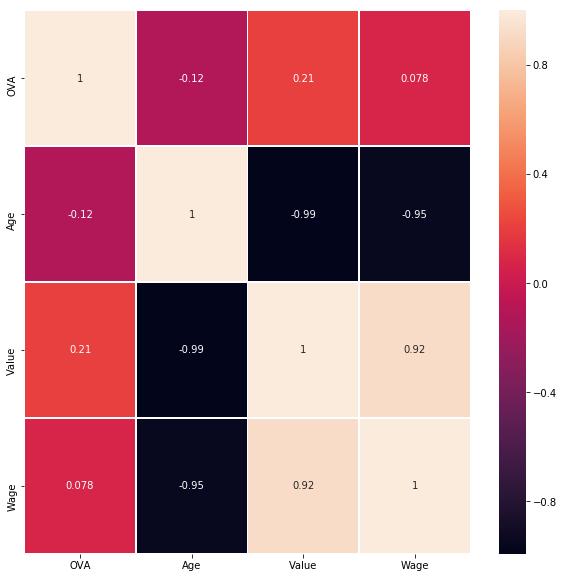

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(PlayersCorr, annot=True, linewidths=.5, ax=ax)

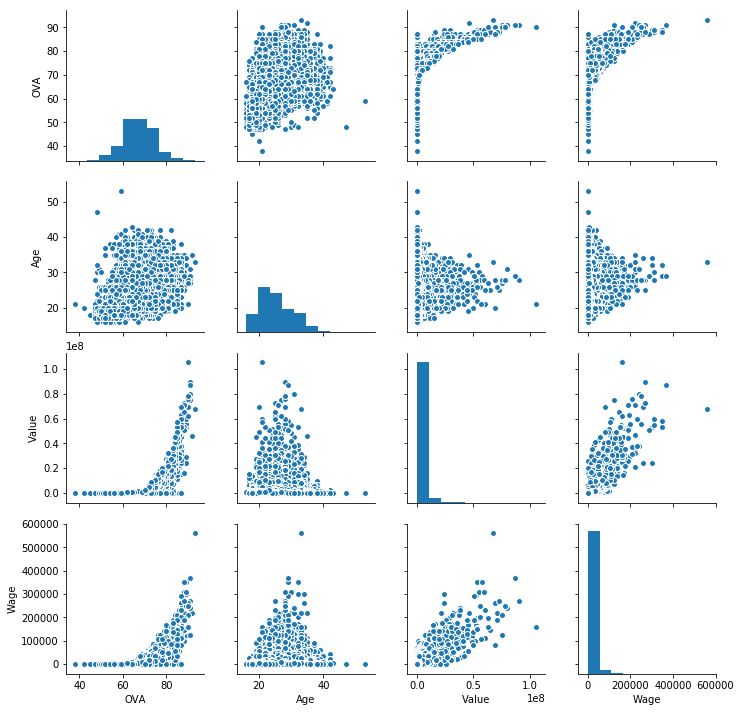

In [248]:
sns.pairplot(Players[["OVA","Age","Value","Wage"]], size=2.5);

# Sacar al mejor futbolista de cada país

In [270]:
Paises_Max=pd.DataFrame({"Paises":list(Paises)})

In [274]:
Paises_Max=pd.DataFrame({"Paises":list(Paises)})

In [392]:
Players_Pais_max=Players.sort_values(by="OVA",ascending=False).drop(columns=Players.columns[16:]).reset_index()
Players_Pais_max=Players_Pais_max.drop_duplicates(subset=['Nationality'],keep='first').sort_values(by="Nationality",ascending=False)


In [330]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 410 kB/s eta 0:00:01    |█████████████████▍              | 5.5 MB 328 kB/s eta 0:00:15
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10738090 sha256=b0cb321c3552f4776bde873083468dfdc09988951aba771857173c6f6553cb76
  Stored in directory: /home/jcons17/.cache/pip/wheels/e9/ce/4d/f3e788cebc00c7f85dd1027ee63d8765240640fbd7915ef970
Successfully built pycountry


In [379]:
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
Players_Pais_max['CODE']=alpha3code(Players_Pais_max["Nationality"])


In [393]:
Players_Pais_max

,index,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Height,Weight,foot,Growth,Value,Wage
1974,7325,222994,M. Nakamba,26,75,Zimbabwe,Aston Villa,76,CDM,CDM CM,78,"5'9""",168lbs,Left,3,7500000.0,44000.0
1546,11958,241202,P. Daka,21,76,Zambia,FC Red Bull Salzburg,78,ST,ST,85,"6'0""",157lbs,Right,9,12000000.0,22000.0
161,1294,173731,G. Bale,30,83,Wales,Tottenham Hotspur,83,RW,RW,83,"6'1""",181lbs,Left,0,24500000.0,130000.0
10370,11047,238147,Đoàn Văn Hâu,20,65,Vietnam,SC Heerenveen,66,LB,LB,75,"6'1""",154lbs,Left,10,800000.0,2000.0
410,4872,207877,J. Martínez,27,81,Venezuela,Atlanta United,82,ST,ST,82,"5'7""",152lbs,Right,1,21000000.0,14000.0
3366,1698,181573,O. Akhmedov,32,73,Uzbekistan,Tianjin TEDA FC,73,CM,CM CDM,73,"5'11""",165lbs,Right,0,3000000.0,13000.0
31,1373,176580,L. Suárez,33,87,Uruguay,Atlético Madrid,87,ST,ST,87,"6'0""",190lbs,Right,0,31500000.0,115000.0
413,8294,227796,C. Pulisic,21,81,United States,Chelsea,82,RM,LW RW LM,87,"5'10""",152lbs,Right,6,24500000.0,83000.0
1085,13300,245221,O. Abdulrahman,26,77,United Arab Emirates,Al Hilal,76,CAM,CAM,78,"5'8""",132lbs,Left,1,10500000.0,40000.0
333,2203,187754,Marlos,32,81,Ukraine,Shakhtar Donetsk,81,RM,RM CAM,81,"5'9""",168lbs,Left,0,14000000.0,0.0


In [335]:
!pip install geopandas

     |████████████████████████████████| 962 kB 502 kB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 347 kB/s eta 0:00:01     |███████████████████             | 3.9 MB 484 kB/s eta 0:00:06     |███████████████████▍            | 3.9 MB 484 kB/s eta 0:00:06
     |████████████████████████████████| 1.0 MB 978 kB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 319 kB/s eta 0:00:01    |▌                               | 245 kB 631 kB/s eta 0:00:23     |████████▊                       | 4.0 MB 6.1 MB/s eta 0:00:02


In [341]:
!pip install descartes

In [380]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'Country', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world,Players_Pais_max,on='CODE')


Text(0.5,1,'Mejor valoración de jugador por cada pais')

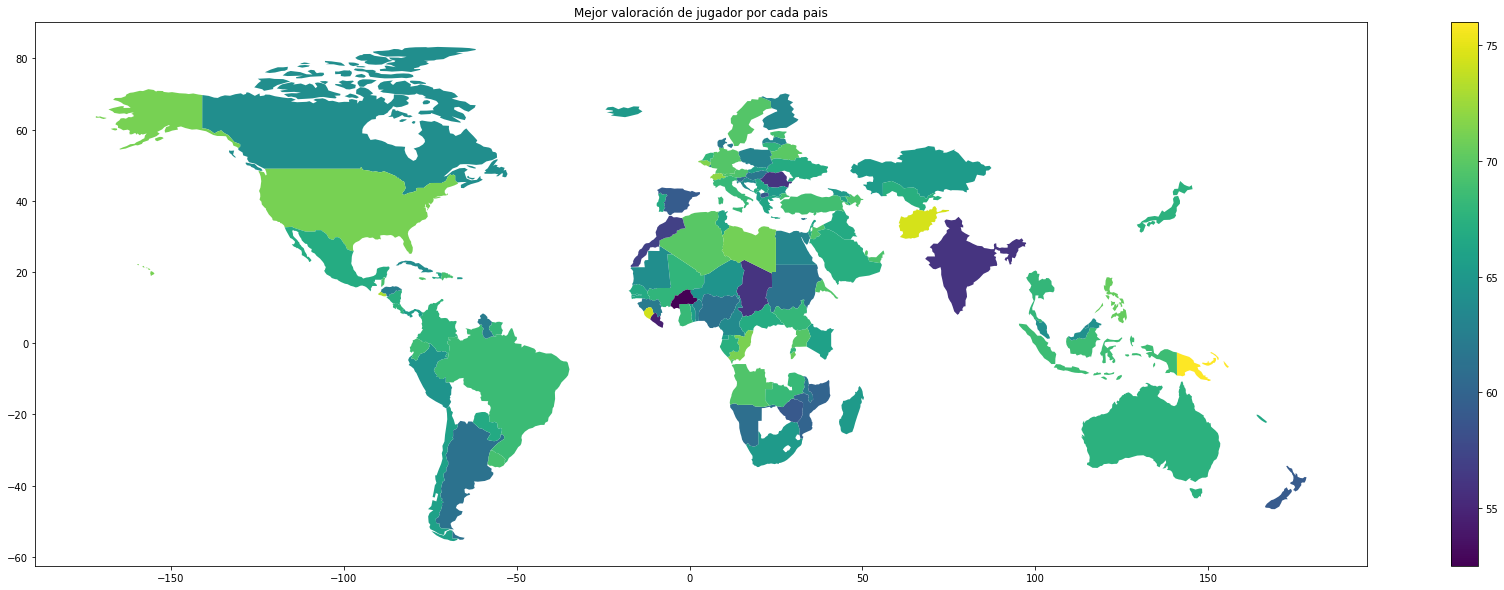

In [396]:
merge.plot(column='OVA',
           figsize=(30, 10),
           legend=True)
plt.title("Mejor valoración de jugador por cada pais")

### Promedios de Valoración, Edad, Sueldo, Valor de mercado por cada país.

In [388]:
Players_Mean_Paises = Players.groupby('Nationality').mean()
Players_Mean_Paises['CODE']=alpha3code(Players_Pais_max["Nationality"])


In [389]:
merge=pd.merge(world,Players_Mean_Paises,on='CODE')


In [398]:
Players_Mean_Paises[["Age","OVA","POT","Value","Wage"]]

,Age,OVA,POT,Value,Wage
Nationality,,,,,
Afghanistan,21.333333,61.333333,69.333333,4.166667e+05,2000.000000
Albania,24.976190,66.809524,72.238095,2.289881e+06,9642.857143
Algeria,26.960784,71.549020,74.137255,5.621765e+06,22137.254902
Andorra,30.000000,63.000000,63.000000,3.000000e+05,0.000000
Angola,25.052632,68.526316,74.157895,3.103421e+06,8368.421053
Antigua &amp; Barbuda,24.142857,60.857143,67.285714,6.507143e+05,3142.857143
Argentina,26.479434,69.668380,74.492288,3.529249e+06,12458.868895
Armenia,27.500000,69.500000,71.750000,3.390625e+06,12500.000000
Aruba,31.000000,68.000000,68.000000,7.750000e+05,4000.000000


Text(0.5,1,'Promedio Valoración por país')

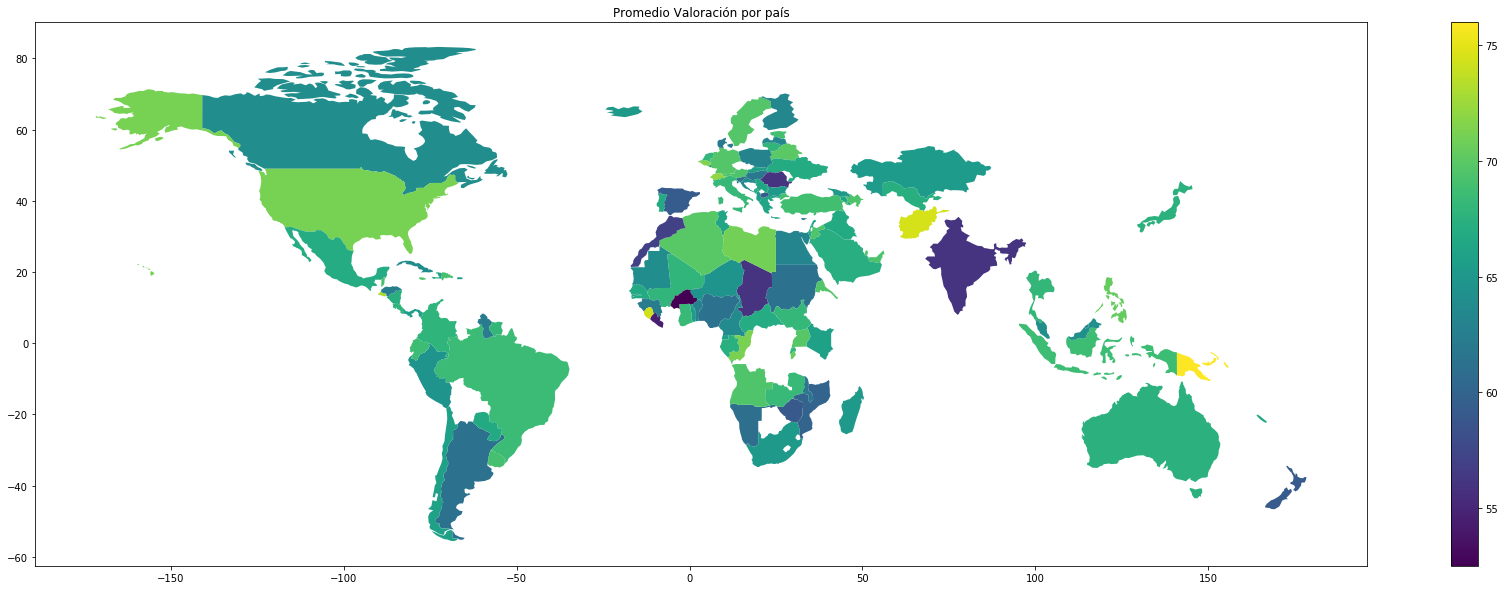

In [395]:
merge.plot(column='OVA',
           figsize=(30, 10),
           legend=True)
plt.title("Promedio Valoración por país")